# `006-compute-grad`

Task: compute the gradient of a function

## Setup

In [1]:
import torch
from torch import tensor
import matplotlib.pyplot as plt
%matplotlib inline

## Task

Suppose we have a dataset with just a single feature `x` and continuous outcome variable `y`.

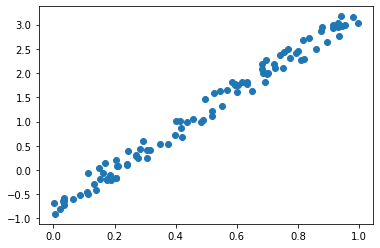

In [2]:
torch.manual_seed(0)
x = torch.rand(100)
noise = torch.rand_like(x) * .5
y_true = 4 * x + noise - 1
plt.scatter(x, y_true);

Let's fit a line to that!

In linear regression, we predict an output by computing `y_pred = weights * x + bias`.
We set `weights` and `bias` in a way that minimizes the mean squared error `mse_loss = (y_pred - y_true).pow(2).mean()`.

Let's set `weights` and `bias` to some arbitrary values and see what `mse_loss` comes out to be.

tensor(0.3251)

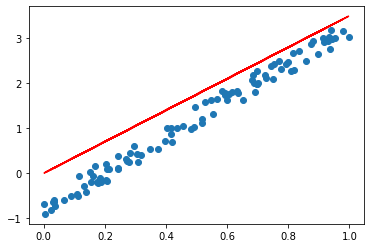

In [3]:
weights = tensor([3.5])
bias = tensor(0.0)
y_pred = weights * x + bias
plt.scatter(x, y_true); plt.plot(x, y_pred, 'r')
mse_loss = (y_pred - y_true).pow(2).mean()
mse_loss

Let's find what changes we could make to `weights` or `bias` that would reduce `mse_loss`. **Your task**:

1. Use PyTorch to compute the gradient of `weights` with respect to `mse_loss`.
2. Use that gradient to work out (by hand!) a new fixed value for `weights`.
3. Recompute `mse_loss` and see that it does go down. (If it doesn't, reconsider what you did in Step 2.)
4. Repeat the 3 steps above for `bias`.

## Solution

In [4]:
# Set up training loop
weights.requires_grad_()
bias.requires_grad_()

losses = []
maxIterations = 1000
lr = 0.1

# Function to plot an individual regression line for predictions
def plot_line(xs, y_preds):
    ys = y_preds.T
    line = plt.plot(xs, ys, marker='o', linewidth=1, markersize=6)
    return line

### First pass

In [5]:
# Calculate new regression line
y_pred = weights * x + bias

# Get loss and back propogate
mse_loss = (y_pred - y_true).pow(2).mean()
losses.append(mse_loss.item())
mse_loss.backward()

# Step down the gradient
weights.data -= weights.grad * lr
bias.data -= bias.grad * lr

# Zero the gradient
weights.grad.zero_()
bias.grad.zero_()

# Display value of weights
weights

tensor([3.4585], requires_grad=True)

### Multiple passes

[Text(0, 0.5, 'Loss'), Text(0.5, 0, 'Step')]

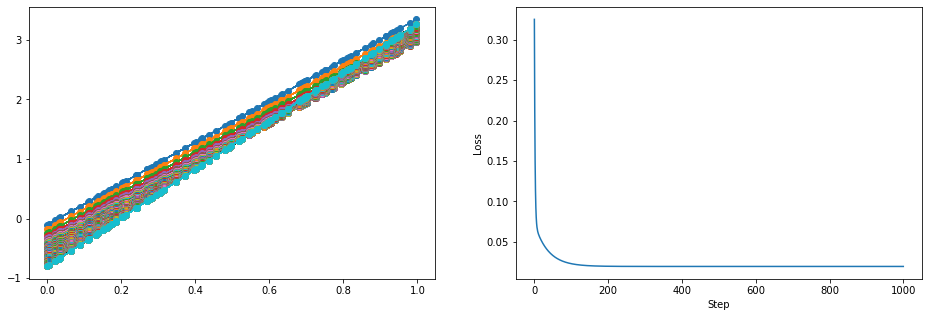

In [6]:
# Build and display plots
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 5))
plt.sca(ax1)

# Training loop
for i in range(maxIterations):
    
    # Calculate new regression line
    y_pred = weights * x + bias
    
    # Plot new regression line
    plot_line(x, y_pred.detach())

    # Get loss and back propogate
    mse_loss = (y_pred - y_true).pow(2).mean()
    losses.append(mse_loss.item())
    mse_loss.backward()

    # Step down the gradient for both parameters
    weights.data -= weights.grad * lr
    bias.data -= bias.grad * lr

    # Zero the gradient
    weights.grad.zero_()
    bias.grad.zero_()
    
# Plot losses
ax2.plot(losses); ax2.set(ylabel="Loss", xlabel="Step")

### Original data + final regression line

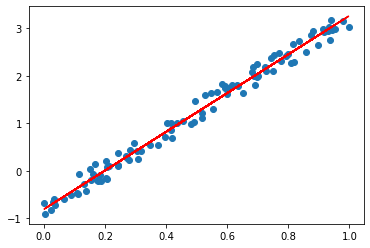

In [7]:
plt.scatter(x, y_true); plt.plot(x, y_pred.detach(), 'r')

## Analysis

What is the true value of `weights`? Did your first change to `weights` get you closer to that value? Explain.

In [8]:
weights

tensor([4.0770], requires_grad=True)

True value for `weights` is 4.0770. My first change to weights did not get me closer to that value; it actually pulled `weights` further from the actual value. This may be due to it being the first step, since it had no idea which direction to step in; this would have given it a large loss, which then would have informed the model which direction to go towards.

## Extension (optional)

1. Put the code above in a loop that changes `weights` and `bias` to minimize `mse_loss`.
2. What is the minimum value that `mse_loss` could possibly take in this situation?
3. Would it be possible to also change `x` or `y` to reduce `mse_loss`? Can you think of a situation where you might want to do that?